# Problem 1

## Setup

In [1]:
import sys
sys.path.append("../src")

import numpy as np
from nat2324.problems import Objective
from nat2324.algorithms import SwarmOptimization
from nat2324.utils import visualize_objectives_3d, visualize_optimization_experiments, run_optimization_experiment

%load_ext autoreload
%autoreload 2

## Question (a)

In [2]:
# Fix the number of evaluations
NUM_GENERATIONS = 1000

# Fix the problem difficulty
DIMENSION = 3
FUNCTION_TYPE = "rastrigin"
FUNCTION_BOUNDS = (-5.12, 5.12)

In [3]:
experiment_setup = {
    "N": range(1, 100, 1),
}

default_kwargs = {
    "fitness_fn": Objective(function_type="rastrigin", is_maximization=True),
    "bounds": FUNCTION_BOUNDS,
    "D": DIMENSION,
    "max_generations": NUM_GENERATIONS,
    "patience": None,
}

In [35]:
results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
)

  0%|          | 0/99 [00:00<?, ?it/s]

In [36]:
print(results['N'].shape)

(99, 1)


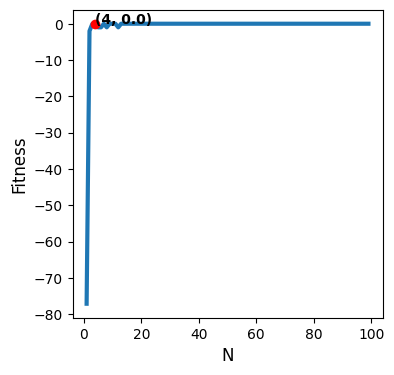

In [37]:
visualize_optimization_experiments(experiment_setup, {"Fitness": results['N']}, is_maximization=True)

## Question (b)

### Varying Space Dimension

In [2]:
# Fix the number of evaluations
NUM_GENERATIONS = 1000

# Fix the objective
FUNCTION_TYPE = "rastrigin"
FUNCTION_BOUNDS = (-5.12, 5.12)

In [3]:
experiment_setup = {
    "N": range(1, 100, 10),
    "D": range(1, 50, 10),
}

default_kwargs = {
    "fitness_fn": Objective(function_type="rastrigin", is_maximization=True),
    "bounds": FUNCTION_BOUNDS,
    "num_generations": NUM_GENERATIONS,
}

In [4]:
results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
)


  0%|          | 0/50 [00:00<?, ?it/s]

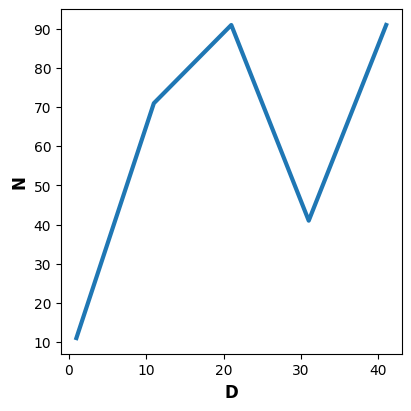

In [5]:
xs = {"D": experiment_setup["D"]}
ys = {"N": np.array(experiment_setup["N"])[np.array(results[('N', 'D')]).argmax(0)]}
visualize_optimization_experiments(xs, ys)

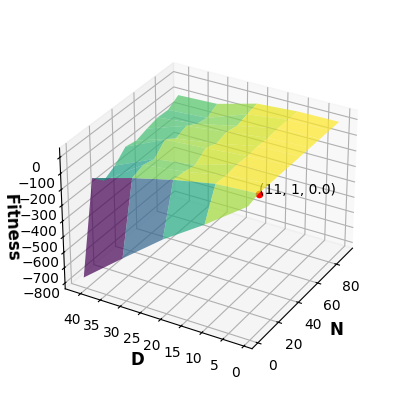

In [11]:
visualize_optimization_experiments({'N': experiment_setup["N"]}, {'D': experiment_setup["D"]}, {'Fitness': results[('N', 'D')]}, is_maximization=True)

### Varying Objective

In [ ]:
objective = Objective(function_type="rastrigin", is_maximization=True)

objectives = {
    # 'sphere': Objectives.sphere,
    # 'rosenbrock': Objectives.rosenbrock,
    'sphere': (objective, objective.bounds),
    # 'ackley': Objectives.ackley,
    # 'griewank': Objectives.griewank,
    # 'schwefel': Objectives.schwefel
}

visualize_objectives_3d(objectives)

## Appendix A